## K-Means Clustering

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs

## Implementation

In [2]:
def fit(X, k):
    # Take k random points from data set and take them as initial centroids
    centroids = X[np.random.randint(0, X.shape[0], size=k)]

    #calculate initial label for each data point
    labels = np.argmin(cdist(X, centroids), axis=1)

    for _iteration in range(10):
        # copy labels for all points for comparing later
        previous_labels = labels.copy()

        # compute new centroids
        centroids = np.array([np.mean(X[labels==r], axis=0) for r in range(k)])

        # at last recalculate label for each data point
        labels = np.argmin(cdist(X, centroids), axis=1)

        # Check if labels of points are not changing
        if all(labels == previous_labels):
            break

    return centroids, labels

## Demonstration

### Generate data

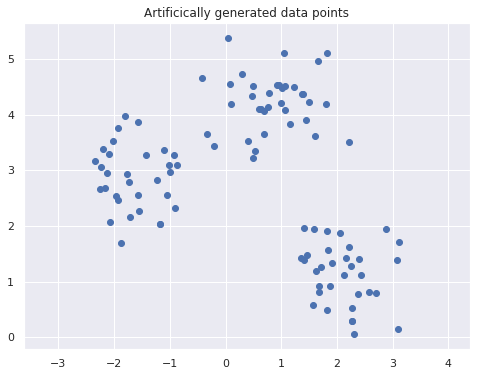

In [3]:
cluster_count = 3

from sklearn.datasets._samples_generator import make_blobs

X, y_true = make_blobs(n_samples = 100,
                        centers = cluster_count,
                        cluster_std = 0.55,
                        random_state = 0) 

plt.figure(figsize=(8,6))
axes = plt.gca()
axes.axis('equal')
plt.scatter(X[:, 0], X[:, 1])
plt.title('Artificically generated data points')
plt.show()

## Clustering

In [4]:
centroids, labels = fit(X, cluster_count)

In [5]:
print("Centroids: ", centroids)

Centroids:  [[ 2.10149963  1.14741919]
 [ 0.84271525  4.22277007]
 [-1.64169636  2.85917392]]


## Visualising the clusters

In [6]:
def plot_kmeans(X, centroids, labels, rseed=0, ax=None):
    #plot the inout data
    ax = ax or plt.gca()
    ax.axis('equal')

    ax.scatter(X[:, 0], X[:, 1], c = labels, s=40, cmap='plasma', zorder=2)

    #PLot the respresentation  of the KMeans model
    radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centroids)]

    for c, r in zip(centroids, radii):
        ax.add_patch(plt.Circle(c, r, fc="#CCCCCC", lw=5, alpha=0.5, zorder=1))

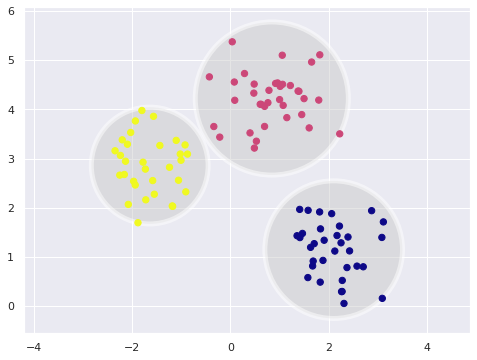

In [7]:
plt.figure(figsize=(8,6))
plot_kmeans(X, centroids, labels)